
This data publication contains a spatial database of wildfires that occurred in the United States from 1992 to 2015. It is the third update of a publication originally generated to support the national Fire Program Analysis (FPA) system. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations. The following core data elements were required for records to be included in this data publication: discovery date, final fire size, and a point location at least as precise as Public Land Survey System (PLSS) section (1-square mile grid). The data were transformed to conform, when possible, to the data standards of the National Wildfire Coordinating Group (NWCG). Basic error-checking was performed and redundant records were identified and removed, to the degree possible. The resulting product, referred to as the Fire Program Analysis fire-occurrence database (FPA FOD), includes 1.88 million geo-referenced wildfire records, representing a total of 140 million acres burned during the 24-year period.

# Q1. Which is the most profitable AirBNB rental size per bedroom?

# Q2. Which rental size has the highest occupancy rate?

### Q3. Which portion of the market is made up of owners with multiple properties?

In [211]:
from tabulate import tabulate

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import sweetviz as sv
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import folium


### Import datasets

In [11]:
nyc = pd.read_csv('C:\\Users\\Orie\\Desktop\\InstituteofData\\MiniProject\\AirBNB\\NYCData.csv')
mia = pd.read_csv('C:\\Users\\Orie\\Desktop\\InstituteofData\\MiniProject\\AirBNB\\MiamiData.csv')
sf = pd.read_csv('C:\\Users\\Orie\\Desktop\\InstituteofData\\MiniProject\\AirBNB\\LAData.csv')
la = pd.read_csv('C:\\Users\\Orie\\Desktop\\InstituteofData\\MiniProject\\AirBNB\\SanFransiscoData.csv')

### Initial EDA

In [20]:
my_report = sv.analyze(nyc)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
nyc.dtypes

Listing Title                                         object
Property Type                                         object
Listing Type                                          object
Created Date                                          object
Last Scraped Date                                     object
Country                                               object
State                                                 object
City                                                  object
Zipcode                                              float64
Currency Native                                       object
Number of Reviews                                      int64
Bedrooms                                              object
Bathrooms                                              int64
Max Guests                                             int64
Airbnb Superhost                                      object
Cancellation Policy                                   object
Cleaning Fee (USD)      

In [9]:
nyc.describe()

,Zipcode,Number of Reviews,Bathrooms,Max Guests,Cleaning Fee (USD),Cleaning Fee (Native),Extra People Fee (USD),Extra People Fee(Native),Minimum Stay,Latitude,...,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native)
count,40266.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,...,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000,40343.000000
mean,10184.524661,43.422899,1.350544,3.727264,47.375158,47.375158,3.719456,3.719456,8.719332,40.866842,...,126.838411,238.161589,71.440572,64.338696,14.520065,11.408200,207.721885,207.721885,17870.830875,17870.830875
std,1894.213441,72.158892,0.760278,2.680276,74.268208,74.268208,10.899148,10.899148,20.011706,0.358968,...,107.336668,107.336668,70.433848,26.805918,20.371053,20.402823,215.251414,215.251414,24682.083984,24682.083984
min,6021.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.535990,...,0.000000,0.000000,0.000000,1.000000,0.000000,-11.000000,10.000000,10.000000,11.000000,11.000000
25%,10002.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,40.689790,...,35.000000,154.000000,15.000000,43.000000,1.000000,-1.000000,90.000000,90.000000,2765.500000,2765.500000
50%,10606.000000,16.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,40.742800,...,90.000000,275.000000,47.000000,66.000000,6.000000,4.000000,150.000000,150.000000,9293.000000,9293.000000
75%,11233.000000,53.000000,2.000000,5.000000,75.000000,75.000000,0.000000,0.000000,6.000000,40.816895,...,211.000000,330.000000,111.000000,89.000000,21.000000,17.000000,248.000000,248.000000,23629.000000,23629.000000
max,92117.000000,2053.000000,17.000000,24.000000,1225.000000,1225.000000,300.000000,300.000000,999.000000,41.999570,...,365.000000,365.000000,357.000000,100.000000,207.000000,204.000000,7000.000000,7000.000000,506383.000000,506383.000000


In [13]:
nyc.head()

,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,Currency Native,...,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native)
0,Two-Story Condo 4 Houses to the Beach in Holgate,Entire condo,entire_home,2022-12-12,2023-03-16,US,New Jersey,Long Beach Township,8008.0,USD,...,33,332,7,25,0,-3,350,350,2888,2888
1,Spectacular Oceanfront Beach Escape,Entire home,entire_home,2023-07-31,2023-12-13,US,New Jersey,Long Beach,8008.0,USD,...,30,335,8,32,0,-3,2627,2627,25219,25219
2,Adventure Cottage | Near LBI | Million Dollar ...,Entire home,entire_home,2023-07-31,2023-08-16,US,New Jersey,Stafford Township,8092.0,USD,...,106,259,55,60,16,15,232,232,25507,25507
3,Peaceful home,Private room in home,private_room,2023-07-31,2023-12-20,US,New Jersey,Stafford Township,8092.0,USD,...,59,306,32,65,7,4,92,92,3528,3528
4,Serenity over the bridge from LBI.,Private room in house,private_room,2020-07-12,2022-01-19,US,New Jersey,Stafford Township,8050.0,USD,...,0,365,0,60,0,10,140,140,168,168


In [15]:
nyc['Listing Type'].value_counts()

entire_home     26213
private_room    13480
shared_room       422
hotel_room        228
Name: Listing Type, dtype: int64

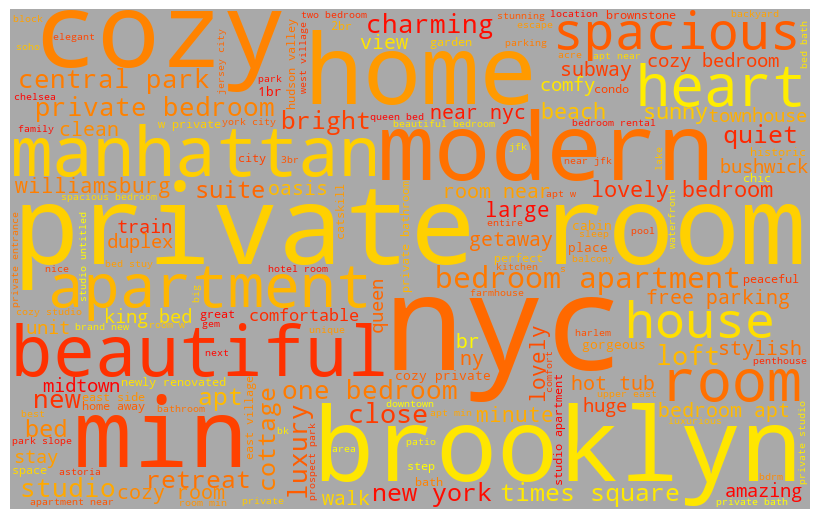

In [143]:

# Initialize an empty string to store the words
comment_words = ''

# Define the stopwords
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in nyc['Listing Title']:
    # Typecaste each val to string
    val = str(val)

    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    # Append the tokens to the comment_words string
    comment_words += " ".join(tokens) + " "

# Define the WordCloud parameters
wordcloud = WordCloud(width=800, height=500,
                      background_color='darkgray',  # Set background color to dark gray
                      colormap='autumn',           # Set colormap to autumn for orange theme
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image                       
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [56]:
bedroom_list= ['Studio', '1', '2', '3', '4', '5']

In [58]:
nyc_5= nyc[nyc['Bedrooms'].isin(bedroom_list)]

In [60]:
my_report = sv.analyze(nyc_5)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [61]:
nyc_5.groupby(['Bedrooms']).mean()

C:\Users\Orie\AppData\Local\Temp\ipykernel_10556\781174402.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_5.groupby(['Bedrooms']).mean()


,Zipcode,Number of Reviews,Bathrooms,Max Guests,Cleaning Fee (USD),Cleaning Fee (Native),Extra People Fee (USD),Extra People Fee(Native),Minimum Stay,Latitude,...,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native)
Bedrooms,,,,,,,,,,,,,,,,,,,,,
1,10130.258682,44.556614,1.116633,2.319857,31.678548,31.678548,3.865604,3.865604,9.028318,40.810558,...,120.646007,244.353993,69.374122,65.046895,14.201586,11.039093,135.363433,135.363433,11567.388604,11567.388604
2,10197.725613,45.142667,1.292514,4.604840,56.332669,56.332669,3.497122,3.497122,8.635288,40.882427,...,132.886451,232.113549,76.593139,65.806808,15.426140,12.372025,232.946284,232.946284,21306.910251,21306.910251
3,10271.956124,37.126455,1.870577,6.629308,71.900708,71.900708,3.509151,3.509151,6.423191,41.000823,...,142.600776,222.399224,74.888838,61.800730,14.976489,12.001141,327.661949,327.661949,29528.540059,29528.540059
4,10465.154367,30.825338,2.631611,8.605781,105.201722,105.201722,4.248337,4.248337,5.508610,41.140873,...,141.429274,223.570726,67.776138,57.132841,13.662362,10.508610,480.102091,480.102091,38654.413899,38654.413899
5,10262.510334,29.666137,3.287758,10.427663,118.276630,118.276630,4.458281,4.458281,6.174881,41.133337,...,137.419714,227.580286,63.178060,54.790143,12.378378,9.162162,685.181240,685.181240,48850.820350,48850.820350
Studio,10196.070793,51.513721,1.026634,2.644875,49.416465,49.416465,2.701864,2.701864,13.841404,40.796109,...,122.175141,242.824859,75.176755,67.857950,14.936642,11.937450,174.252623,174.252623,15893.334948,15893.334948


In [64]:
nyc_sample= nyc_5.loc[:,['Listing Type', 'Bedrooms', 'Bathrooms', 'Max Guests', 'Overall Rating', 'Airbnb Host ID', 'Count Available Days LTM', 'Count Reservation Days LTM', 'Occupancy Rate LTM', 'Number of Bookings LTM', 'Average Daily Rate (USD)', 'Annual Revenue LTM (USD)' ]]

In [65]:
nyc_sample.groupby(['Bedrooms']).mean()

C:\Users\Orie\AppData\Local\Temp\ipykernel_10556\4258954054.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_sample.groupby(['Bedrooms']).mean()


,Bathrooms,Max Guests,Overall Rating,Airbnb Host ID,Count Available Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Average Daily Rate (USD),Annual Revenue LTM (USD)
Bedrooms,,,,,,,,,,
1,1.116633,2.319857,4.709146,1.856947e+08,120.646007,69.374122,65.046895,14.201586,135.363433,11567.388604
2,1.292514,4.604840,4.760283,1.779811e+08,132.886451,76.593139,65.806808,15.426140,232.946284,21306.910251
3,1.870577,6.629308,4.778772,1.832035e+08,142.600776,74.888838,61.800730,14.976489,327.661949,29528.540059
4,2.631611,8.605781,4.811888,1.764702e+08,141.429274,67.776138,57.132841,13.662362,480.102091,38654.413899
5,3.287758,10.427663,4.802846,1.727975e+08,137.419714,63.178060,54.790143,12.378378,685.181240,48850.820350
Studio,1.026634,2.644875,4.711269,1.631113e+08,122.175141,75.176755,67.857950,14.936642,174.252623,15893.334948


C:\Users\Orie\AppData\Local\Temp\ipykernel_10556\404074081.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nyc_sample.corr()


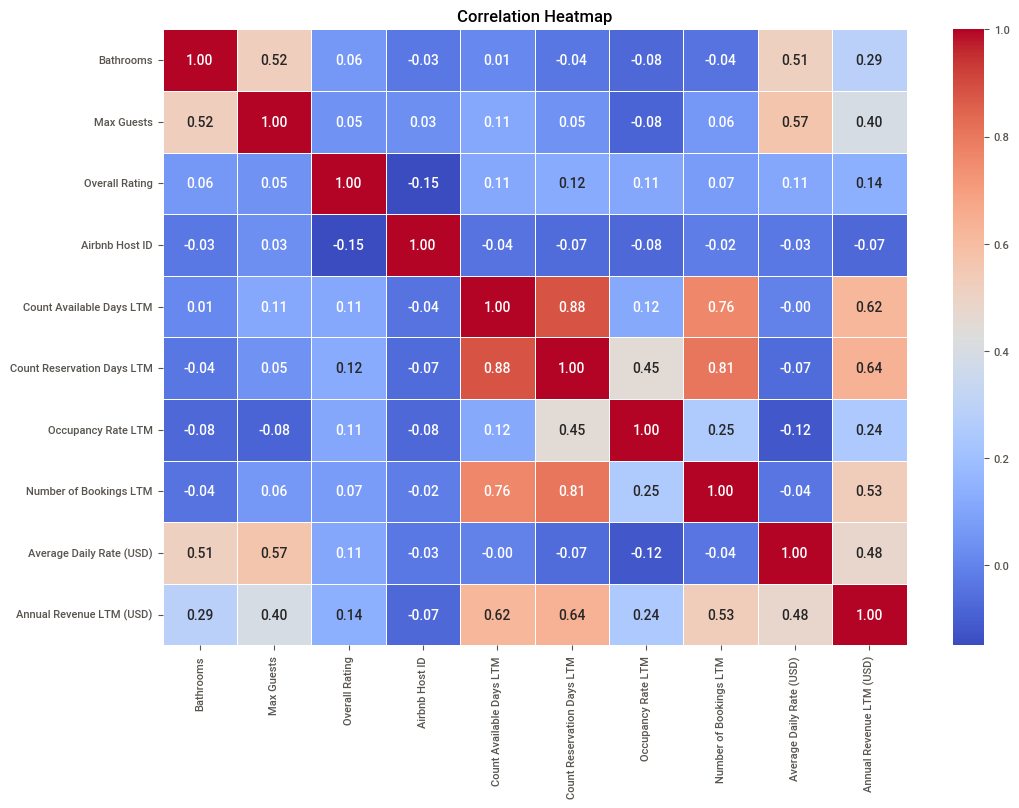

In [66]:

# Compute the correlation matrix
correlation_matrix = nyc_sample.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

In [72]:
# Create a copy of nyc_5 DataFrame as nyc_per
nyc_per = nyc_sample.copy()

# Replace 'Studio' with '1' in the 'Bedrooms' column and convert it to numeric
nyc_per['Bedrooms'] = pd.to_numeric(nyc_per['Bedrooms'].replace('Studio', '1'))

# Divide 'Average Daily Rate (USD)' by 'Bedrooms'
nyc_per['Average Daily Rate (USD)'] = nyc_per['Average Daily Rate (USD)'] / nyc_per['Bedrooms']

# Divide 'Annual Revenue LTM (USD)' by 'Bedrooms'
nyc_per['Annual Revenue LTM (USD)'] = nyc_per['Annual Revenue LTM (USD)'] / nyc_per['Bedrooms']

# Divide 'Bathrooms' by 'Bedrooms'
nyc_per['Bathrooms'] = nyc_per['Bathrooms'] / nyc_per['Bedrooms']


In [73]:
nyc_per.groupby(['Bedrooms']).mean()

C:\Users\Orie\AppData\Local\Temp\ipykernel_10556\665217126.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_per.groupby(['Bedrooms']).mean()


,Bathrooms,Max Guests,Overall Rating,Airbnb Host ID,Count Available Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Average Daily Rate (USD),Annual Revenue LTM (USD)
Bedrooms,,,,,,,,,,
1,1.107948,2.351221,4.709354,1.835154e+08,120.793567,69.934071,65.318159,14.272518,139.116204,11984.838467
2,0.646257,4.604840,4.760283,1.779811e+08,132.886451,76.593139,65.806808,15.426140,116.473142,10653.455126
3,0.623526,6.629308,4.778772,1.832035e+08,142.600776,74.888838,61.800730,14.976489,109.220650,9842.846686
4,0.657903,8.605781,4.811888,1.764702e+08,141.429274,67.776138,57.132841,13.662362,120.025523,9663.603475
5,0.657552,10.427663,4.802846,1.727975e+08,137.419714,63.178060,54.790143,12.378378,137.036248,9770.164070


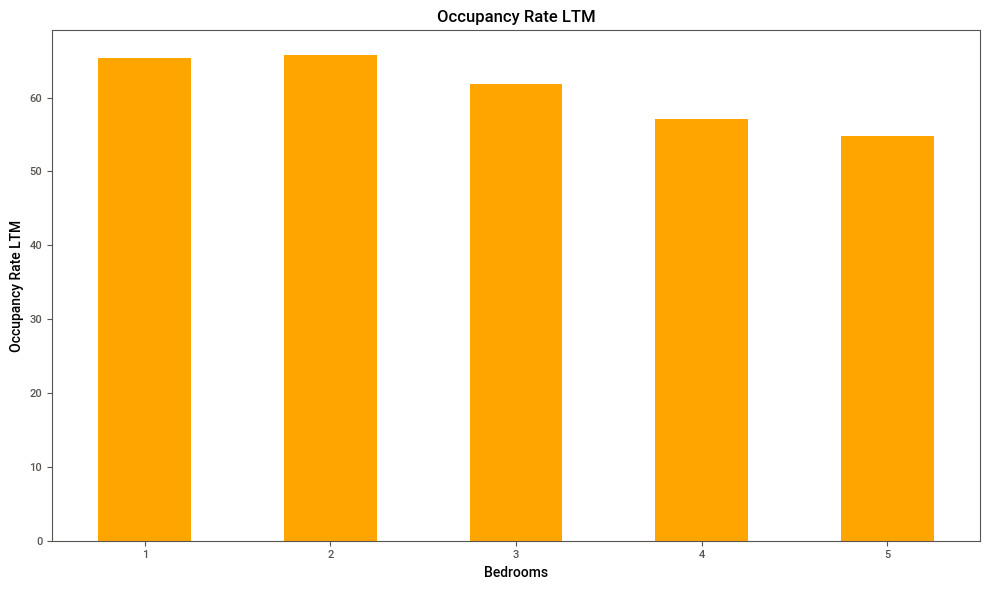

In [119]:

# Group the data by 'Bedrooms' and calculate the average 'Occupancy Rate LTM' for each bedroom number
occupancy_rate_per_bedroom = nyc_per.groupby('Bedrooms')['Occupancy Rate LTM'].mean()

# Plot the average 'Average Daily Rate (USD)' per bedroom number
plt.figure(figsize=(10, 6))
occupancy_rate_per_bedroom.plot(kind='bar', color='orange')
plt.xlabel('Bedrooms')
plt.ylabel('Occupancy Rate LTM')
plt.title('Occupancy Rate LTM')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

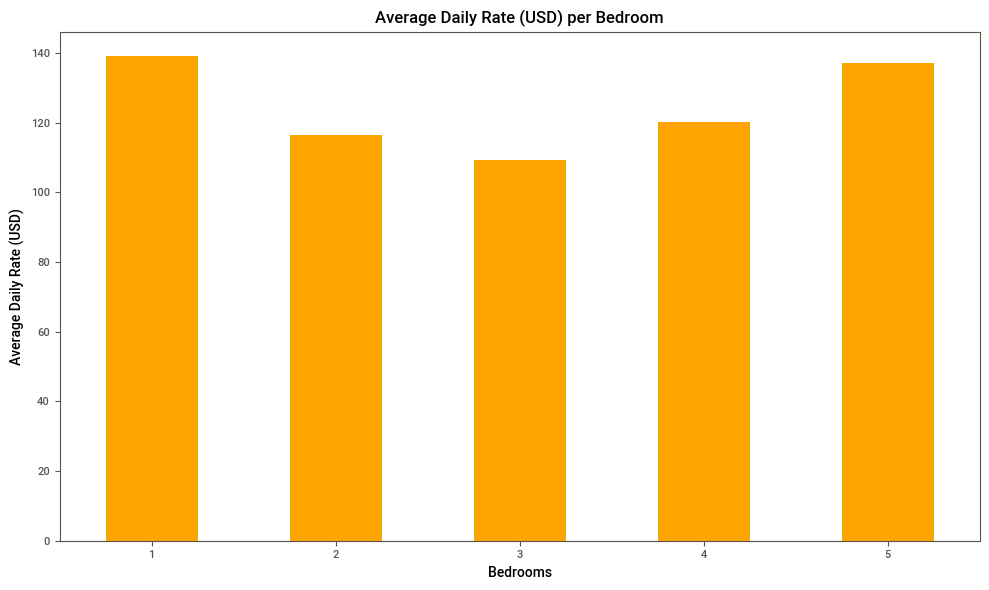

In [128]:

# Group the data by 'Bedrooms' and calculate the average 'Average Daily Rate (USD)' for each bedroom number
average_daily_rate_per_bedroom = nyc_per.groupby('Bedrooms')['Average Daily Rate (USD)'].mean()

# Plot the average 'Average Daily Rate (USD)' per bedroom number
plt.figure(figsize=(10, 6))
average_daily_rate_per_bedroom.plot(kind='bar', color='orange')
plt.xlabel('Bedrooms')
plt.ylabel('Average Daily Rate (USD)')
plt.title('Average Daily Rate (USD) per Bedroom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

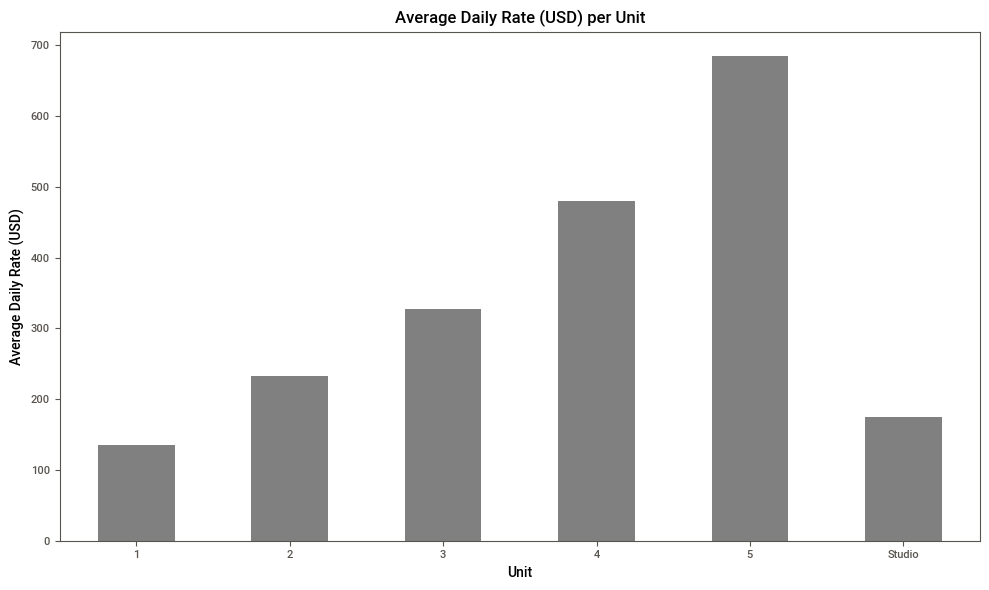

In [129]:
# Assuming 'Unit' column represents the unit each property belongs to
nyc_sample['Unit'] = nyc_sample['Bedrooms']  # Create a new column 'Unit' (you might need to adjust this based on your data)

# Group the data by 'Unit' and calculate the average 'Average Daily Rate (USD)' for each unit
average_daily_rate_per_unit = nyc_sample.groupby('Unit')['Average Daily Rate (USD)'].mean()

# Plot the average 'Average Daily Rate (USD)' per unit
plt.figure(figsize=(10, 6))
average_daily_rate_per_unit.plot(kind='bar', color='gray')
plt.xlabel('Unit')
plt.ylabel('Average Daily Rate (USD)')
plt.title('Average Daily Rate (USD) per Unit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

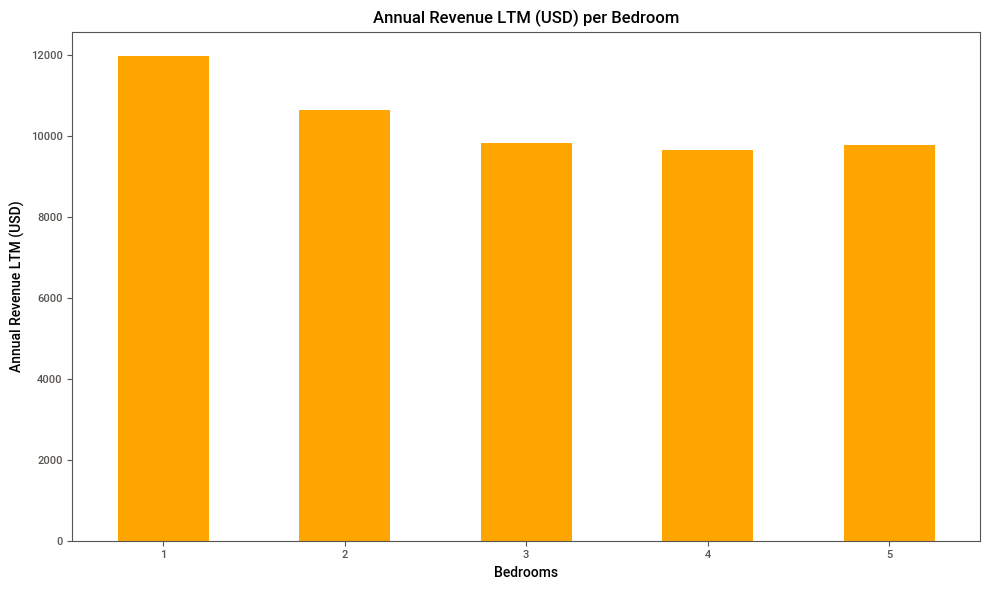

In [131]:

# Group the data by 'Bedrooms' and calculate the average ''Annual Revenue LTM (USD)'' for each bedroom number
annual_rev_per_bedroom = nyc_per.groupby('Bedrooms')['Annual Revenue LTM (USD)'].mean()

# Plot the average 'Average Daily Rate (USD)' per bedroom number
plt.figure(figsize=(10, 6))
annual_rev_per_bedroom.plot(kind='bar', color='orange')
plt.xlabel('Bedrooms')
plt.ylabel('Annual Revenue LTM (USD)')
plt.title('Annual Revenue LTM (USD) per Bedroom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

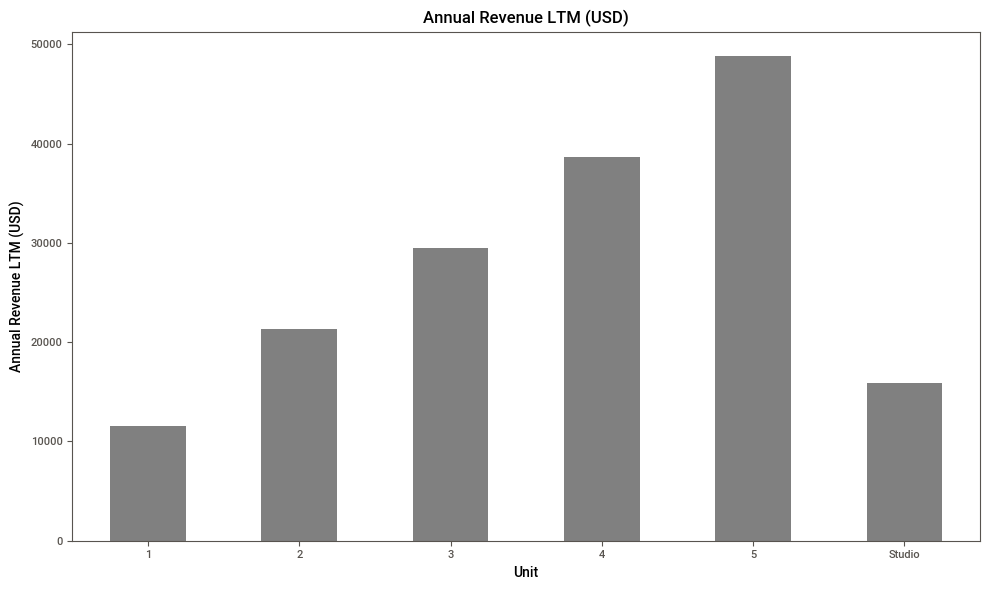

In [133]:
# Assuming 'Unit' column represents the unit each property belongs to
nyc_sample['Unit'] = nyc_sample['Bedrooms']  # Create a new column 'Unit' (you might need to adjust this based on your data)

# Group the data by 'Unit' and calculate the average 'Annual Revenue LTM (USD)' for each unit
annual_rev_per_unit = nyc_sample.groupby('Unit')['Annual Revenue LTM (USD)'].mean()

# Plot the average 'Average Daily Rate (USD)' per unit
plt.figure(figsize=(10, 6))
annual_rev_per_unit.plot(kind='bar', color='gray')
plt.xlabel('Unit')
plt.ylabel('Annual Revenue LTM (USD)')
plt.title('Annual Revenue LTM (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [95]:
def ecdf(data, column):
    x = np.sort(data[column])
    y = np.arange(1, len(x) + 1) / len(x)
    plt.plot(x, y, marker='.', linestyle='none')
    plt.xlabel(column)
    plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()

In [95]:
def ecdf(data, column):
    x = np.sort(data[column])
    y = np.arange(1, len(x) + 1) / len(x)
    plt.plot(x, y, marker='.', linestyle='none')
    plt.xlabel(column)
    plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()

In [134]:
nyc_studio= nyc_5[nyc_5['Bedrooms'] == 'Studio']
nyc_1br = nyc_5[nyc_5['Bedrooms'] == '1']
nyc_2br= nyc_5[nyc_5['Bedrooms'] == '2']
nyc_3br= nyc_5[nyc_5['Bedrooms'] == '3']
nyc_4br= nyc_5[nyc_5['Bedrooms'] == '4']
nyc_5br= nyc_5[nyc_5['Bedrooms'] == '5']

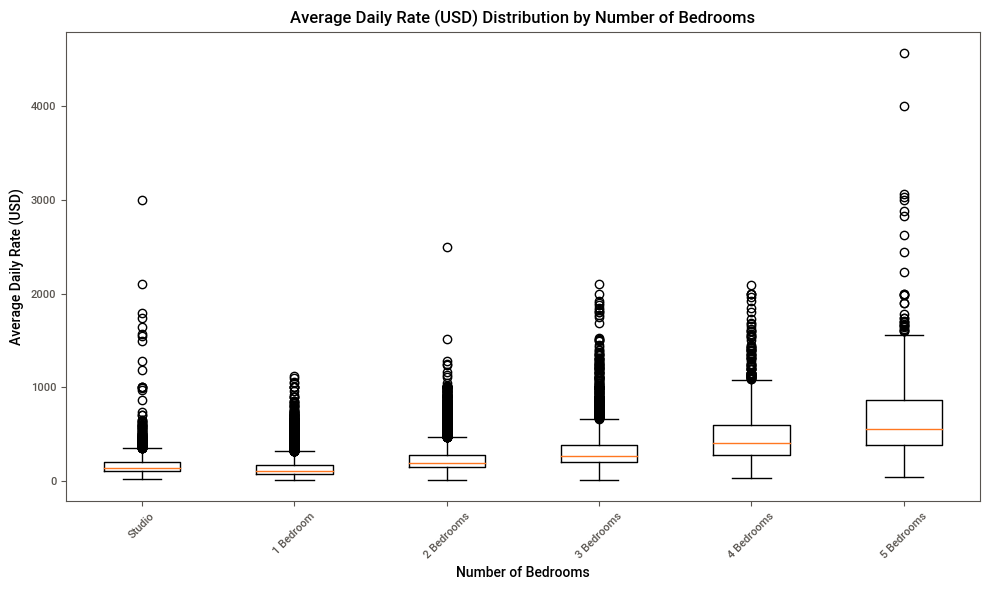

In [137]:

# Create a list of the DataFrames
dataframes = [nyc_studio, nyc_1br, nyc_2br, nyc_3br, nyc_4br, nyc_5br]

# Create a list of labels for the boxplot
labels = ['Studio', '1 Bedroom', '2 Bedrooms', '3 Bedrooms', '4 Bedrooms', '5 Bedrooms']

# Create a box and whisker plot for each DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot([df['Average Daily Rate (USD)'] for df in dataframes], labels=labels)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Daily Rate (USD)')
plt.title('Average Daily Rate (USD) Distribution by Number of Bedrooms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

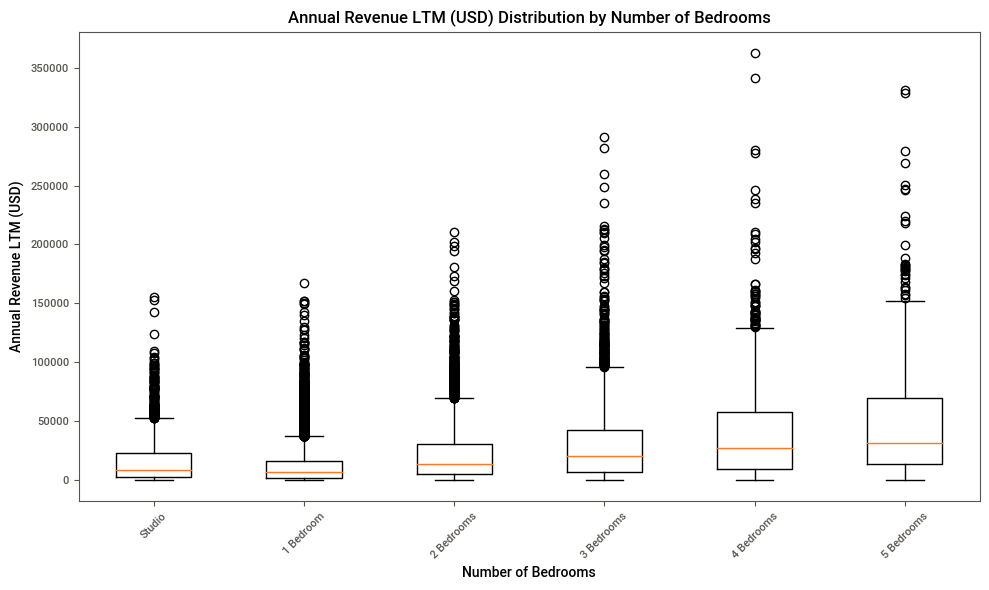

In [140]:

# Create a list of the DataFrames
dataframes = [nyc_studio, nyc_1br, nyc_2br, nyc_3br, nyc_4br, nyc_5br]

# Create a list of labels for the boxplot
labels = ['Studio', '1 Bedroom', '2 Bedrooms', '3 Bedrooms', '4 Bedrooms', '5 Bedrooms']

# Create a box and whisker plot for each DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot([df['Annual Revenue LTM (USD)'] for df in dataframes], labels=labels)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Annual Revenue LTM (USD)')
plt.title('Annual Revenue LTM (USD) Distribution by Number of Bedrooms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

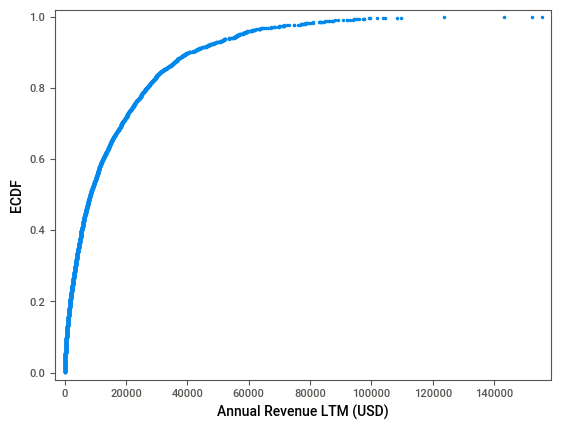

In [98]:
ecdf(nyc_studio, 'Annual Revenue LTM (USD)')

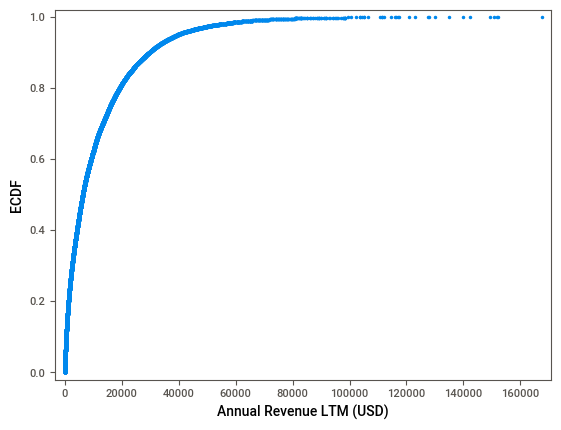

In [99]:
ecdf(nyc_1br, 'Annual Revenue LTM (USD)')

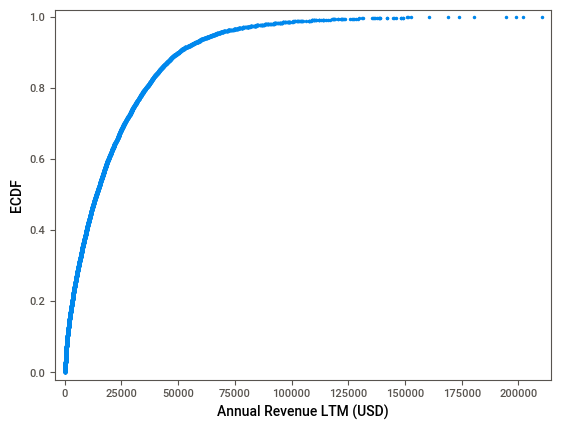

In [100]:
ecdf(nyc_2br, 'Annual Revenue LTM (USD)')

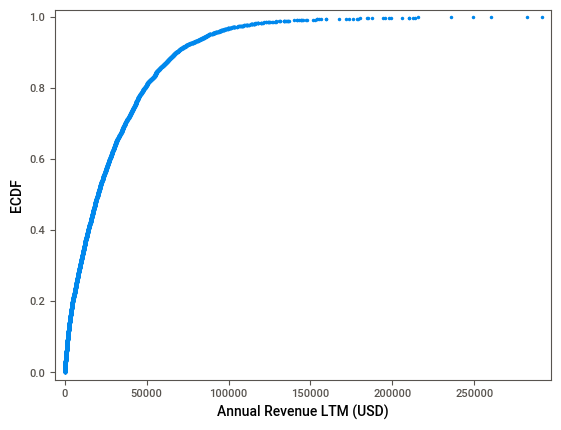

In [101]:
ecdf(nyc_3br, 'Annual Revenue LTM (USD)')

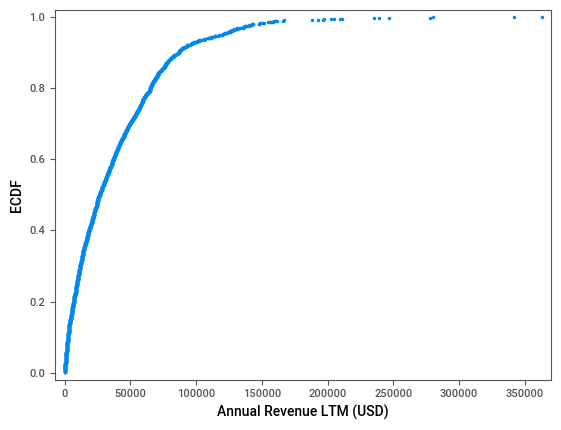

In [102]:
ecdf(nyc_4br, 'Annual Revenue LTM (USD)')

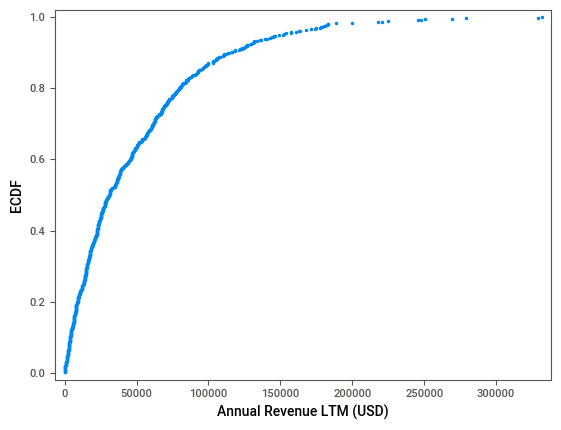

In [103]:
ecdf(nyc_5br, 'Annual Revenue LTM (USD)')

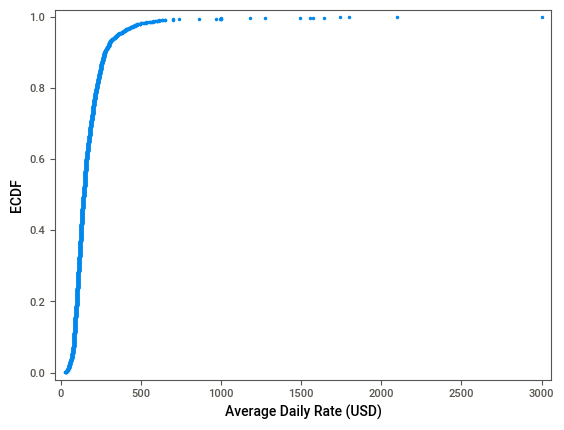

In [104]:
ecdf(nyc_studio, 'Average Daily Rate (USD)')

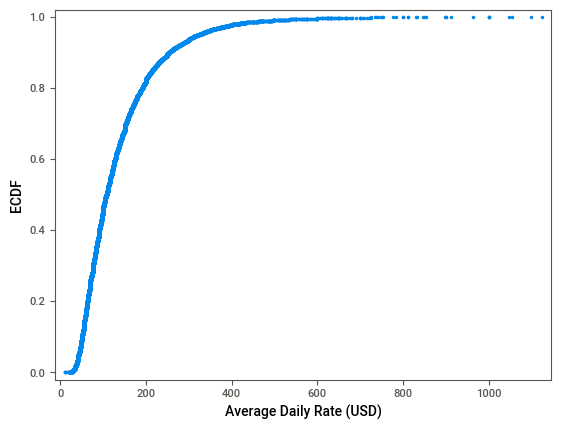

In [105]:
ecdf(nyc_1br, 'Average Daily Rate (USD)')

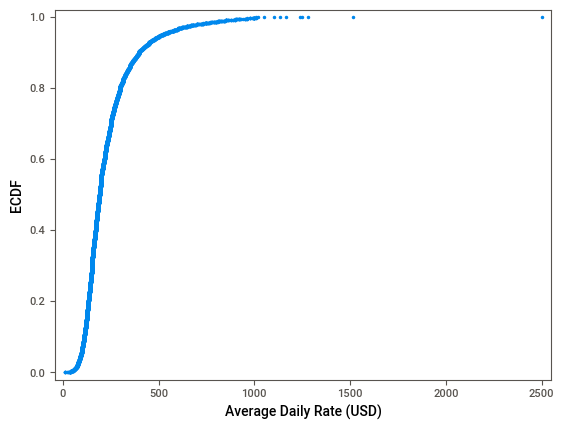

In [106]:
ecdf(nyc_2br, 'Average Daily Rate (USD)')

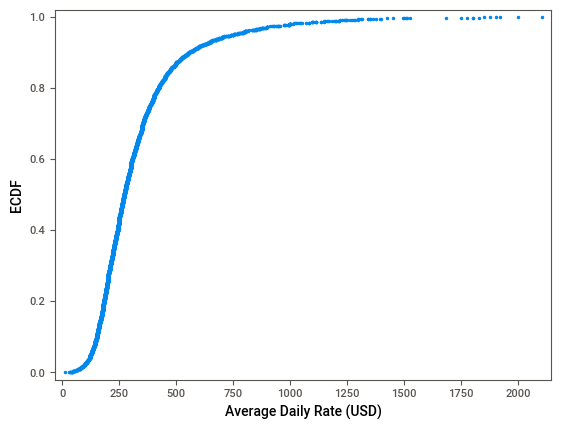

In [107]:
ecdf(nyc_3br, 'Average Daily Rate (USD)')

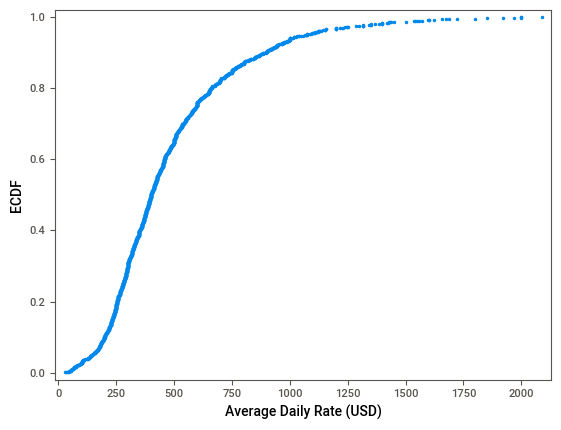

In [108]:
ecdf(nyc_4br, 'Average Daily Rate (USD)')

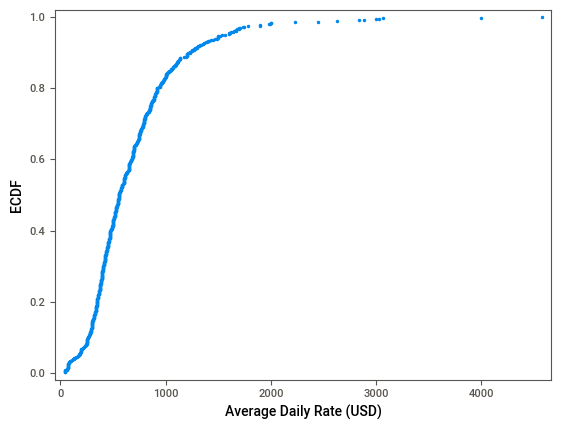

In [109]:
ecdf(nyc_5br, 'Average Daily Rate (USD)')

In [110]:
# Count the number of listings per host
host_listing_counts = nyc_per['Airbnb Host ID'].value_counts()

# Count the number of unique hosts (hosts with only one listing)
unique_hosts_count = (host_listing_counts == 1).sum()

# Count the number of hosts with multiple listings
multiple_hosts_count = (host_listing_counts > 1).sum()

print("Number of unique hosts:", unique_hosts_count)
print("Number of hosts with multiple listings:", multiple_hosts_count)

Number of unique hosts: 18038
Number of hosts with multiple listings: 5696


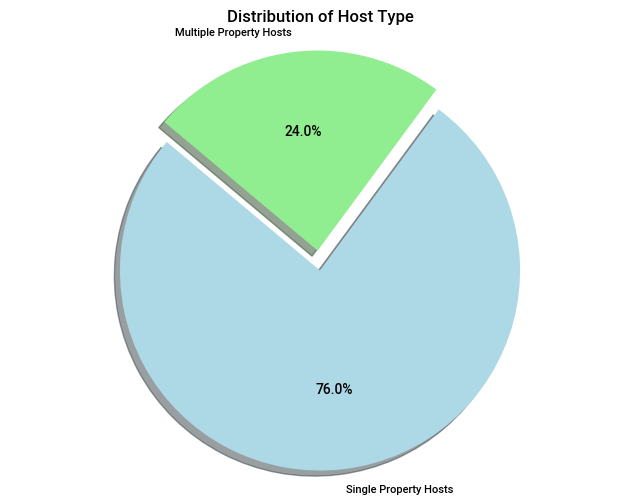

In [208]:
host_listing_counts = nyc_5['Airbnb Host ID'].value_counts()

# Count the number of unique hosts (hosts with only one listing)
unique_hosts_count = (host_listing_counts == 1).sum()

# Count the number of hosts with multiple listings
multiple_hosts_count = (host_listing_counts > 1).sum()

# Define data for the pie chart
labels = ['Single Property Hosts', 'Multiple Property Hosts']
sizes = [unique_hosts_count, multiple_hosts_count]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the first slice (Single Hosts)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Host Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

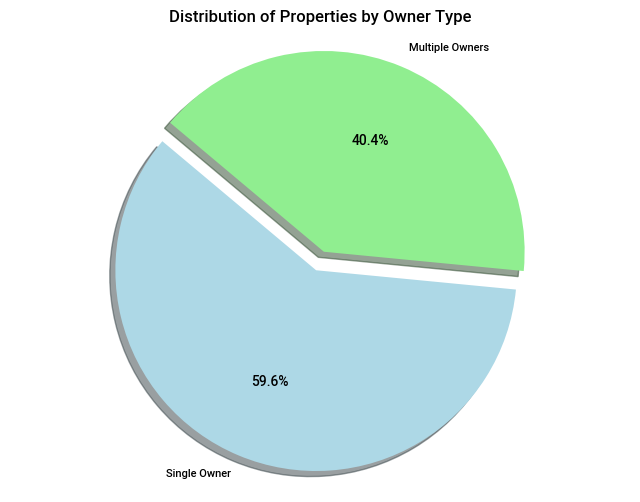

In [112]:

# Count the number of unique hosts (hosts with only one listing)
unique_hosts_count = nyc_5['Airbnb Host ID'].nunique()

# Count the number of hosts with multiple listings
multiple_hosts_count = len(nyc_5) - unique_hosts_count

# Define data for the pie chart
labels = ['Single Owner', 'Multiple Owners']
sizes = [unique_hosts_count, multiple_hosts_count]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the first slice (Single Owner)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Properties by Owner Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

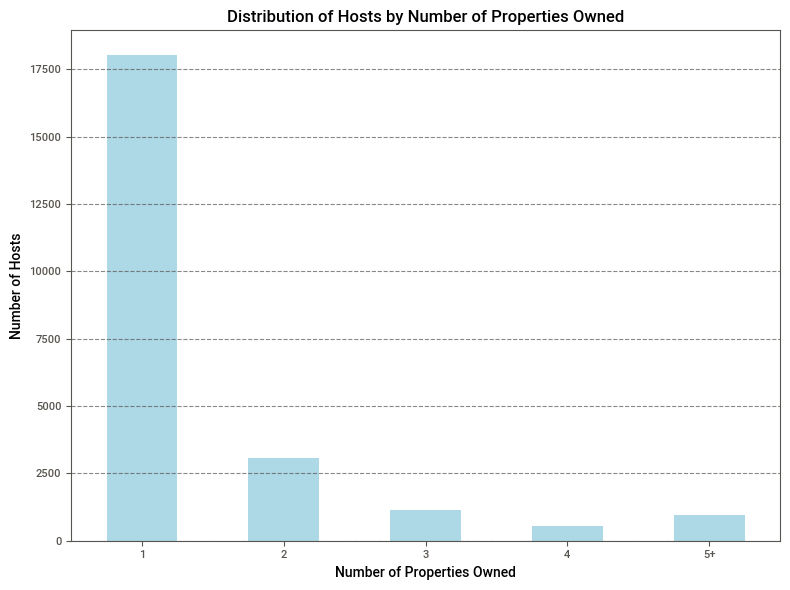

In [113]:
# Calculate the number of properties owned by each host
host_listing_counts = nyc_5['Airbnb Host ID'].value_counts()

# Count the number of unique hosts (hosts with only one listing)
unique_hosts_count = (host_listing_counts == 1).sum()

# Count the number of hosts with multiple listings
multiple_hosts_count = (host_listing_counts > 1).sum()

# Binning hosts with multiple properties into 5 different populations
bins = [1, 2, 3, 4, 5, float('inf')]
bin_labels = ['1', '2', '3', '4', '5+']
bin_counts = pd.cut(host_listing_counts, bins=bins, labels=bin_labels, right=False).value_counts().sort_index()

# Plotting the binned data
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Number of Properties Owned')
plt.ylabel('Number of Hosts')
plt.title('Distribution of Hosts by Number of Properties Owned')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [114]:
# Calculate the number of properties owned by each host
host_listing_counts = nyc_5['Airbnb Host ID'].value_counts()

# Sort the host_listing_counts Series in descending order
sorted_hosts = host_listing_counts.sort_values(ascending=False)

# Select the top 5 hosts
top_5_hosts = sorted_hosts.head(5)

# Display the top 5 hosts
print("Top 5 Airbnb hosts with the most properties:")
print(top_5_hosts)

Top 5 Airbnb hosts with the most properties:
158969505    199
121680792    177
137358866    135
51501835     126
371972456    100
Name: Airbnb Host ID, dtype: int64


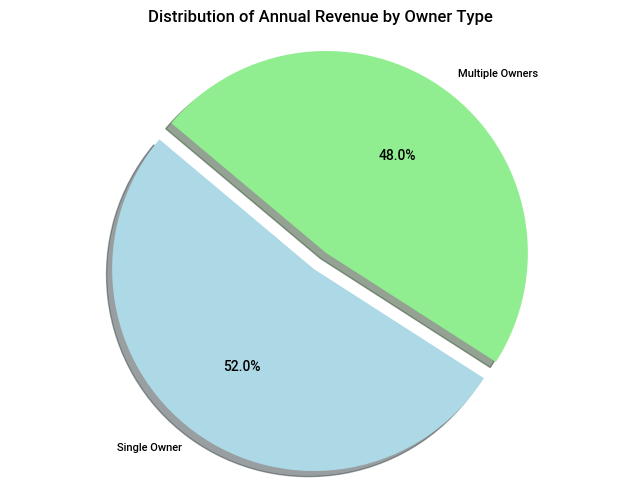

In [115]:
# Calculate the sum of 'Annual Revenue LTM (USD)' for single owners
single_owner_revenue = nyc_5[nyc_5['Airbnb Host ID'].map(host_listing_counts) == 1]['Annual Revenue LTM (USD)'].sum()

# Calculate the sum of 'Annual Revenue LTM (USD)' for owners with multiple properties
multiple_owner_revenue = nyc_5[nyc_5['Airbnb Host ID'].map(host_listing_counts) > 1]['Annual Revenue LTM (USD)'].sum()

# Define data for the pie chart
labels = ['Single Owner', 'Multiple Owners']
sizes = [single_owner_revenue, multiple_owner_revenue]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the first slice (Single Owner)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Annual Revenue by Owner Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [209]:
# Group the DataFrame by 'Airbnb Host ID' and aggregate the count of properties and sum of annual revenue
host_summary = nyc_5.groupby('Airbnb Host ID').agg({
    'Listing Type': 'count',  # Count the number of listings
    'Annual Revenue LTM (USD)': 'sum'  # Sum the annual revenue LTM
}).reset_index()

# Rename the columns for clarity
host_summary.columns = ['Airbnb Host ID', 'Number of Properties', 'Annual Revenue LTM (USD)']

# Sort the hosts by annual revenue in descending order and select the top ten hosts
top_10_hosts = host_summary.sort_values(by='Annual Revenue LTM (USD)', ascending=False).head(10)

# Display the top ten hosts along with the number of properties and annual revenue
print("Top 10 Airbnb hosts with the highest Annual Revenue LTM (USD):")
print(top_10_hosts)

Top 10 Airbnb hosts with the highest Annual Revenue LTM (USD):
       Airbnb Host ID  Number of Properties  Annual Revenue LTM (USD)
12740       121680792                   177                   4267279
14103       158969505                   199                   3313320
8598         42219345                    74                   2691141
15766       219517861                    63                   2315632
18026       319005137                    84                   1690178
19056       371972456                   100                   1552817
9413         51548122                    52                   1548765
15558       211549023                    23                   1398989
20165       412467812                    21                   1332331
2952          5004078                    37                   1278828


In [212]:
# Convert the DataFrame to a list of lists
table_data = top_10_hosts.values.tolist()

# Define the headers
headers = ['Airbnb Host ID', 'Number of Properties', 'Annual Revenue LTM (USD)']

# Generate the table in tabular format
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Print the table
print("Top 10 Airbnb hosts with the highest Annual Revenue LTM (USD):")
print(table)

Top 10 Airbnb hosts with the highest Annual Revenue LTM (USD):
+------------------+------------------------+----------------------------+
|   Airbnb Host ID |   Number of Properties |   Annual Revenue LTM (USD) |
+==================+========================+============================+
|        121680792 |                    177 |                    4267279 |
+------------------+------------------------+----------------------------+
|        158969505 |                    199 |                    3313320 |
+------------------+------------------------+----------------------------+
|         42219345 |                     74 |                    2691141 |
+------------------+------------------------+----------------------------+
|        219517861 |                     63 |                    2315632 |
+------------------+------------------------+----------------------------+
|        319005137 |                     84 |                    1690178 |
+------------------+-----------------

In [144]:
# Assuming 'Zip Code' is the column name in nyc_5 DataFrame
top_10_zip_codes = nyc_5['Zipcode'].value_counts().head(10)

print("Top 10 most common zip codes:")
print(top_10_zip_codes)


Top 10 most common zip codes:
11221.0    905
11216.0    723
11233.0    629
10002.0    611
10036.0    568
11206.0    555
11211.0    546
10016.0    528
10019.0    517
11238.0    422
Name: Zipcode, dtype: int64


In [146]:
# Group the data by 'Zip Code' and calculate the sum of 'Annual Revenue LTM (USD)' for each zip code
revenue_by_zip = nyc_5.groupby('Zipcode')['Annual Revenue LTM (USD)'].sum()

# Sort the result to get the top 10 zip codes by 'Annual Revenue LTM (USD)'
top_10_zip_revenue = revenue_by_zip.sort_values(ascending=False).head(10)

print("Top 10 zip codes by Annual Revenue LTM (USD):")
print(top_10_zip_revenue)

Top 10 zip codes by Annual Revenue LTM (USD):
Zipcode
11221.0    15019309
11216.0    12559079
10002.0    11597921
10001.0    11358765
10016.0    10886926
11233.0    10653445
10036.0    10595003
11211.0     9888713
10019.0     9663944
12401.0     8873361
Name: Annual Revenue LTM (USD), dtype: int64


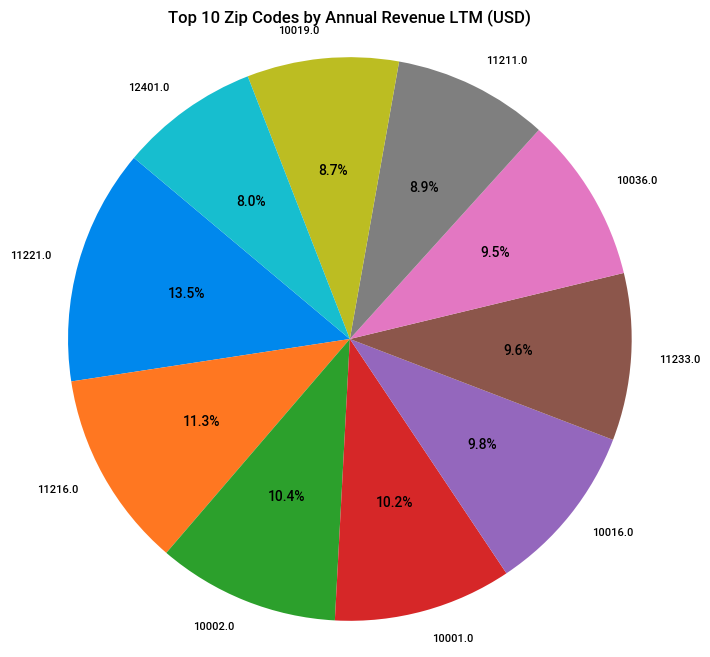

In [148]:
# Group the data by 'Zip Code' and calculate the sum of 'Annual Revenue LTM (USD)' for each zip code
revenue_by_zip = nyc_5.groupby('Zipcode')['Annual Revenue LTM (USD)'].sum()

# Sort the result to get the top 10 zip codes by 'Annual Revenue LTM (USD)'
top_10_zip_revenue = revenue_by_zip.sort_values(ascending=False).head(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_zip_revenue, labels=top_10_zip_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Zip Codes by Annual Revenue LTM (USD)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [149]:
nyc_zips= pd.read_csv('C:\\Users\\Orie\Desktop\\InstituteofData\\MiniProject\\AirBNB\\nyc-zip-codes.csv')

In [157]:
#Merge nyc_5 with nyc_zips on the 'Zip Code' column from nyc_5 and the 'ZipCode' column from nyc_zips
nyc_5_with_neighborhood = pd.merge(nyc_5, nyc_zips[['ZipCode', 'Neighborhood']], left_on='Zipcode', right_on='ZipCode', how='left')

# Drop the extra 'ZipCode' column after merging
nyc_5_with_neighborhood.drop(columns=['ZipCode'], inplace=True)

# Display the resulting DataFrame
print(nyc_5_with_neighborhood)

                                           Listing Title  \
0       Two-Story Condo 4 Houses to the Beach in Holgate   
1                    Spectacular Oceanfront Beach Escape   
2      Adventure Cottage | Near LBI | Million Dollar ...   
3                                          Peaceful home   
4                     Serenity over the bridge from LBI.   
...                                                  ...   
39831              Peaceful estate with gardens and pool   
39832                                  Blueberry Cottage   
39833  Entire Berkshires 1830s Home filled with antiques   
39834                      Rural retreat in Colebrook CT   
39835     Spacious Barkhamsted Home: Private & Peaceful!   

                     Property Type  Listing Type Created Date  \
0                     Entire condo   entire_home   2022-12-12   
1                      Entire home   entire_home   2023-07-31   
2                      Entire home   entire_home   2023-07-31   
3             Priva

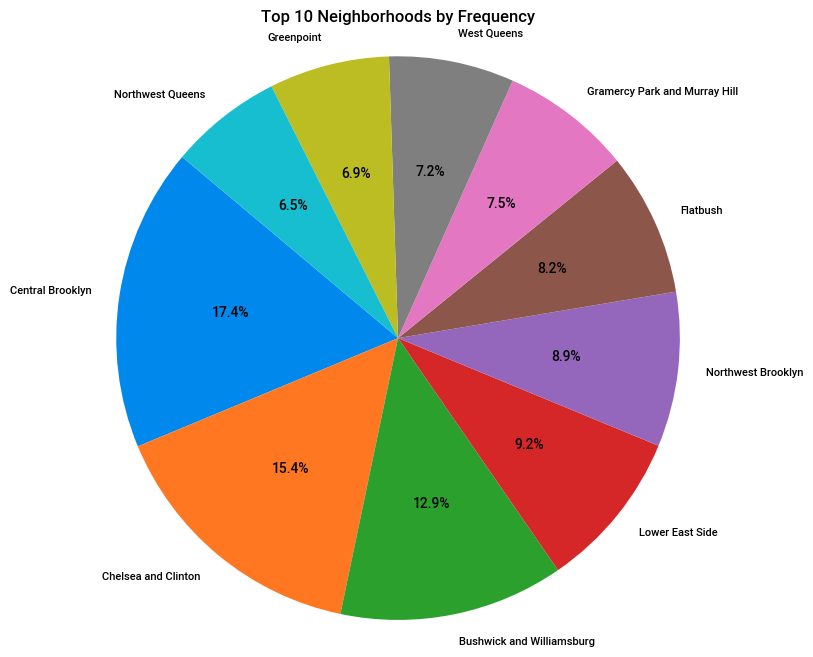

In [158]:
# Count the occurrences of each neighborhood
neighborhood_counts = nyc_5_with_neighborhood['Neighborhood'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Neighborhoods by Frequency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

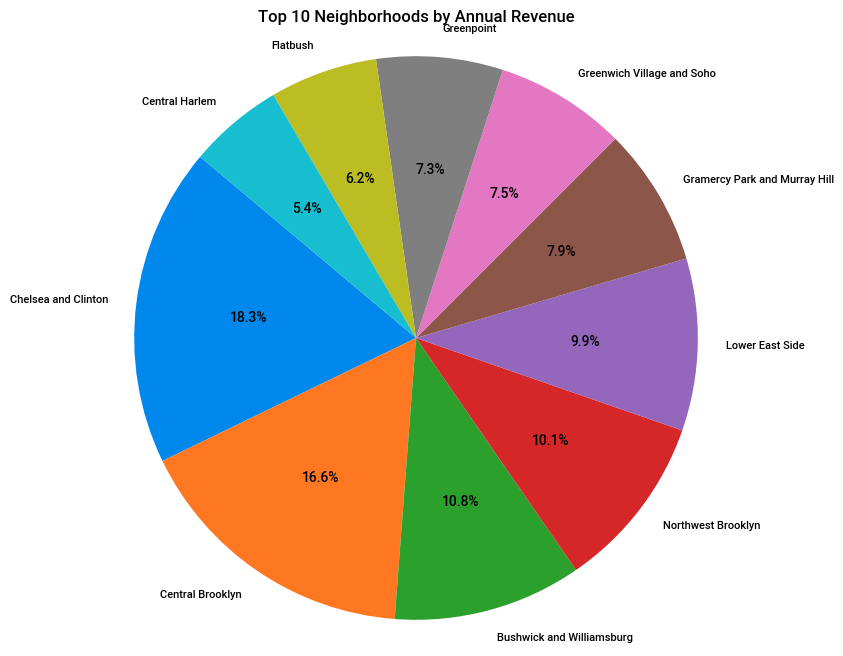

In [169]:
# Aggregate annual revenue by neighborhood
neighborhood_revenue = nyc_5_with_neighborhood.groupby('Neighborhood')['Annual Revenue LTM (USD)'].sum().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(neighborhood_revenue, labels=neighborhood_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Neighborhoods by Annual Revenue')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [198]:
nyc_5_with_neighborhood.dtypes

Listing Title                                         object
Property Type                                         object
Listing Type                                          object
Created Date                                          object
Last Scraped Date                                     object
Country                                               object
State                                                 object
City                                                  object
Zipcode                                               object
Currency Native                                       object
Number of Reviews                                      int64
Bedrooms                                              object
Bathrooms                                              int64
Max Guests                                             int64
Airbnb Superhost                                      object
Cancellation Policy                                   object
Cleaning Fee (USD)      

In [199]:
nyc_zipcodes.dtypes

OBJECTID             int64
postalCode          object
PO_NAME             object
STATE               object
borough             object
ST_FIPS             object
CTY_FIPS            object
BLDGpostalCode       int64
Shape_Leng         float64
Shape_Area         float64
@id                 object
geometry          geometry
dtype: object

In [200]:
# Perform the merge and indicate the source of each row
merged = nyc_5_with_neighborhood.merge(nyc_zipcodes, how='outer', left_on='Zipcode', right_on='postalCode', indicator=True)

# Count the number of rows in each category
count_left_only = (merged['_merge'] == 'left_only').sum()
count_right_only = (merged['_merge'] == 'right_only').sum()
count_both = (merged['_merge'] == 'both').sum()

# Display the counts
print("Number of rows only in the left DataFrame:", count_left_only)
print("Number of rows only in the right DataFrame:", count_right_only)
print("Number of rows in both DataFrames:", count_both)

Number of rows only in the left DataFrame: 16088
Number of rows only in the right DataFrame: 55
Number of rows in both DataFrames: 24493


In [205]:
# Check unique values in the 'Zipcode' column of nyc_5_with_neighborhood
print("Unique postal codes in nyc_5_with_neighborhood:")
print(nyc_5_with_neighborhood['Zipcode'].unique())

# Check unique values in the 'postalCode' column of nyc_zipcodes
print("\nUnique postal codes in nyc_zipcodes:")
print(nyc_zipcodes['postalCode'].unique())

Unique postal codes in nyc_5_with_neighborhood:
[ 8008.  8092.  8050.  8006.  8005.  8758.  8721.  8740.  8757.  8722.
  8755.  8732.  8753.  8752.  8751.  8735.  8514.  8550.  8540.  8542.
  8512.  8536.  8553.  8824.  8852.  8823.  8902.  8527.  8535.  7726.
  7728.  8723.  8701.  8724.  8738.  8742.  8736.  8730.  7731.  7727.
  7719.  8750.  7762.  7753.  7720.  7712.  7756.  7711.  8831.  7751.
  8816.  8850.  8901.  8873.  8904.  8882.  8872.  8859.  8879.  7722.
  7733.  7724.  7755.  7764.  7740.  7701.  7739.  7704.  7747.  7730.
  7748.  7735.  7734.  7716.  7760.  7732.  7830.  8844.  8807.  8805.
  8876.  8858.  7977.  7920.  7946.  7924.  7865.  7840.  7853.  7930.
  7850.  7843.  7856.  7821.  7874.  7849.  7885.  8854.  8817.  7080.
  7063.  7060.  8820.  8837.  8840.  8863.  8861.  7095.  8830.  7067.
  7001.  7065.  7069.  7933.  7062.  7023.  7076.  7922.  7976.  7935.
  7090.  7066.  7016.  7027.  7092.  7036.  7203.  7204.  7033.  7083.
  7081.  7901.  7928.  7078. 

In [215]:
nyc_5_with_neighborhood['Zipcode'] = nyc_5_with_neighborhood['Zipcode'].astype(str).str.replace('.', '')

# Convert unique postal codes in nyc_zipcodes to strings and remove periods
nyc_zipcodes = nyc_zipcodes.astype(str).str.replace('.', '')

C:\Users\Orie\AppData\Local\Temp\ipykernel_10556\3883291554.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nyc_5_with_neighborhood['Zipcode'] = nyc_5_with_neighborhood['Zipcode'].astype(str).str.replace('.', '')


AttributeError: 'DataFrame' object has no attribute 'str'

In [203]:
# Check unique values in the 'Zipcode' column of nyc_5_with_neighborhood
print("Unique postal codes in nyc_5_with_neighborhood:")
print(nyc_5_with_neighborhood['Zipcode'].unique())

# Check unique values in the 'postalCode' column of nyc_zipcodes
print("\nUnique postal codes in nyc_zipcodes:")
print(nyc_zipcodes['postalCode'].unique())

Unique postal codes in nyc_5_with_neighborhood:
[ 8008.  8092.  8050.  8006.  8005.  8758.  8721.  8740.  8757.  8722.
  8755.  8732.  8753.  8752.  8751.  8735.  8514.  8550.  8540.  8542.
  8512.  8536.  8553.  8824.  8852.  8823.  8902.  8527.  8535.  7726.
  7728.  8723.  8701.  8724.  8738.  8742.  8736.  8730.  7731.  7727.
  7719.  8750.  7762.  7753.  7720.  7712.  7756.  7711.  8831.  7751.
  8816.  8850.  8901.  8873.  8904.  8882.  8872.  8859.  8879.  7722.
  7733.  7724.  7755.  7764.  7740.  7701.  7739.  7704.  7747.  7730.
  7748.  7735.  7734.  7716.  7760.  7732.  7830.  8844.  8807.  8805.
  8876.  8858.  7977.  7920.  7946.  7924.  7865.  7840.  7853.  7930.
  7850.  7843.  7856.  7821.  7874.  7849.  7885.  8854.  8817.  7080.
  7063.  7060.  8820.  8837.  8840.  8863.  8861.  7095.  8830.  7067.
  7001.  7065.  7069.  7933.  7062.  7023.  7076.  7922.  7976.  7935.
  7090.  7066.  7016.  7027.  7092.  7036.  7203.  7204.  7033.  7083.
  7081.  7901.  7928.  7078. 